In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



import folium #visualize spatial data in an interactive manner

##  Data Exploration

I have applied Exploratory Data Analysis (EDA) techniques to extract insights from the dataset to know which features have contributed more in predicting target attributes by performing Data Analysis using Pandas and NumPy and Data visualization using Matplotlib,
Seaborn and Plotly. 

**Steps to Perform in Data Exploration**

1. Understanding the Dataset and Shape (Rows & Columns) 
2. Checking Data Types of the Attributes 
3. Exploring Categorical Attributes 
4. Exploring Numerical Attributes 
5. Checking Statistical Summary of the dataset - Descriptive Statistics
6. Checking Missing Values (Nan) in Dataset
7. Checking Distribution of Target Attribute 
8. Data Visualization of Important Attributes 

In [3]:
# from folium.plugins import HeatMap
# from folium import plugins
# from collections import namedtuple
# from shapely.geometry import Point

### 1. Understanding Data Set and Shape of the dataset

In [4]:
df = pd.read_csv('data/crime.csv')
pd.set_option('display.max_columns',None)
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [5]:
df.shape

(2237605, 14)

### 2. Checking Data Types of the Attributes 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Dc_Dist             int64  
 1   Psa                 object 
 2   Dispatch_Date_Time  object 
 3   Dispatch_Date       object 
 4   Dispatch_Time       object 
 5   Hour                int64  
 6   Dc_Key              int64  
 7   Location_Block      object 
 8   UCR_General         float64
 9   Text_General_Code   object 
 10  Police_Districts    float64
 11  Month               object 
 12  Lon                 float64
 13  Lat                 float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


### 3. Exploring Categorical Attributes 

In [7]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  7


In [8]:
print(cat_feature)

['Psa', 'Dispatch_Date_Time', 'Dispatch_Date', 'Dispatch_Time', 'Location_Block', 'Text_General_Code', 'Month']


In [9]:
df[cat_feature][:5]

,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Location_Block,Text_General_Code,Month
0,3,2009-10-02 14:24:00,2009-10-02,14:24:00,S 38TH ST / MARKETUT ST,Other Assaults,2009-10
1,1,2009-05-10 00:55:00,2009-05-10,00:55:00,8500 BLOCK MITCH,All Other Offenses,2009-05
2,J,2009-08-07 15:40:00,2009-08-07,15:40:00,6TH CAMBRIA,Other Assaults,2009-08
3,D,2009-07-19 01:09:00,2009-07-19,01:09:00,5500 BLOCK N 5TH ST,Weapon Violations,2009-07
4,R,2009-06-25 00:14:00,2009-06-25,00:14:00,1800 BLOCK WYLIE ST,All Other Offenses,2009-06


### 4. Exploring Numerical Attributes 

In [10]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
print("Number of Numerical Features are : ",len(num_feature))

Number of Numerical Features are :  7


In [11]:
print(num_feature)

['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General', 'Police_Districts', 'Lon', 'Lat']


In [12]:
df[num_feature][:3]

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
0,18,14,200918067518,800.0,NaN,NaN,NaN
1,14,0,200914033994,2600.0,NaN,NaN,NaN
2,25,15,200925083199,800.0,NaN,NaN,NaN


### 5. Statistical Summary of the dataset - Descriptive Statistics

In [13]:
df.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,2.237605e+06,2.237605e+06,2.237605e+06,2.236942e+06,2.217675e+06,2.220256e+06,2.220256e+06
mean,1.726837e+01,1.315990e+01,2.010975e+11,1.271354e+03,1.206404e+01,-7.514992e+01,3.999201e+01
std,1.064898e+01,6.799952e+00,3.234684e+08,8.143510e+02,5.792056e+00,5.973890e-02,4.534823e-02
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01
25%,9.000000e+00,9.000000e+00,2.008151e+11,6.000000e+02,8.000000e+00,-7.518490e+01,3.995571e+01
50%,1.600000e+01,1.400000e+01,2.011060e+11,8.000000e+02,1.200000e+01,-7.515668e+01,3.999105e+01
75%,2.400000e+01,1.900000e+01,2.014021e+11,1.800000e+03,1.700000e+01,-7.511844e+01,4.002739e+01
max,9.200000e+01,2.300000e+01,2.017770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01


### 6. Checking Missing Values (NaN) in Dataset 

In [14]:
df.isnull().sum()

Dc_Dist                   0
Psa                       0
Dispatch_Date_Time        0
Dispatch_Date             0
Dispatch_Time             0
Hour                      0
Dc_Key                    0
Location_Block            0
UCR_General             663
Text_General_Code       663
Police_Districts      19930
Month                     0
Lon                   17349
Lat                   17349
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Dc_Dist               0
Psa                   0
Dispatch_Date_Time    0
Dispatch_Date         0
Dispatch_Time         0
Hour                  0
Dc_Key                0
Location_Block        0
UCR_General           0
Text_General_Code     0
Police_Districts      0
Month                 0
Lon                   0
Lat                   0
dtype: int64

In [17]:
df['Dispatch_Date_Time'] = pd.to_datetime(df['Dispatch_Date_Time'])
df = df.sort_values(by='Dispatch_Date_Time', ascending=True)

In [18]:
df['Crime_Year'] = df['Dispatch_Date_Time'].dt.year
df['Crime_Month'] = df['Dispatch_Date_Time'].dt.month
df['Crime_Day'] = df['Dispatch_Date_Time'].dt.day

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2217021 entries, 1038493 to 2172835
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Dc_Dist             int64         
 1   Psa                 object        
 2   Dispatch_Date_Time  datetime64[ns]
 3   Dispatch_Date       object        
 4   Dispatch_Time       object        
 5   Hour                int64         
 6   Dc_Key              int64         
 7   Location_Block      object        
 8   UCR_General         float64       
 9   Text_General_Code   object        
 10  Police_Districts    float64       
 11  Month               object        
 12  Lon                 float64       
 13  Lat                 float64       
 14  Crime_Year          int64         
 15  Crime_Month         int64         
 16  Crime_Day           int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 304.5+ MB


In [20]:
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Crime_Year,Crime_Month,Crime_Day
1038493,3,I,2006-01-01 00:00:00,2006-01-01,00:00:00,0,200603000002,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,2006,1,1
1338793,19,R,2006-01-01 00:02:00,2006-01-01,00:02:00,0,200619000047,5500 BLOCK CHERRY ST,800.0,Other Assaults,15.0,2006-01,-75.231975,39.963220,2006,1,1
1389932,3,I,2006-01-01 00:02:00,2006-01-01,00:02:00,0,200603000001,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,2006,1,1
1325562,18,Q,2006-01-01 00:04:00,2006-01-01,00:04:00,0,200618000007,400 BLOCK S 55TH ST,1500.0,Weapon Violations,14.0,2006-01,-75.232374,39.953490,2006,1,1
1395649,12,P,2006-01-01 00:05:00,2006-01-01,00:05:00,0,200612000011,1700 BLOCK S 58TH ST,1500.0,Weapon Violations,9.0,2006-01,-75.230711,39.937644,2006,1,1


In [21]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {} % Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

### 7. Checking the Distribution of Dist (Target Variable)

In [22]:
df['Dc_Dist'].value_counts(normalize = True)

15    0.082806
24    0.072786
25    0.067824
19    0.061893
12    0.059138
35    0.058772
22    0.057057
14    0.054273
2     0.052215
18    0.048786
39    0.043489
6     0.042994
26    0.039030
3     0.038354
9     0.037569
17    0.033518
8     0.033110
16    0.032591
1     0.021822
7     0.020051
5     0.013975
4     0.013074
23    0.012231
77    0.002059
92    0.000581
Name: Dc_Dist, dtype: float64

Text(0.5, 1.0, 'Total number of crimes commited per year')

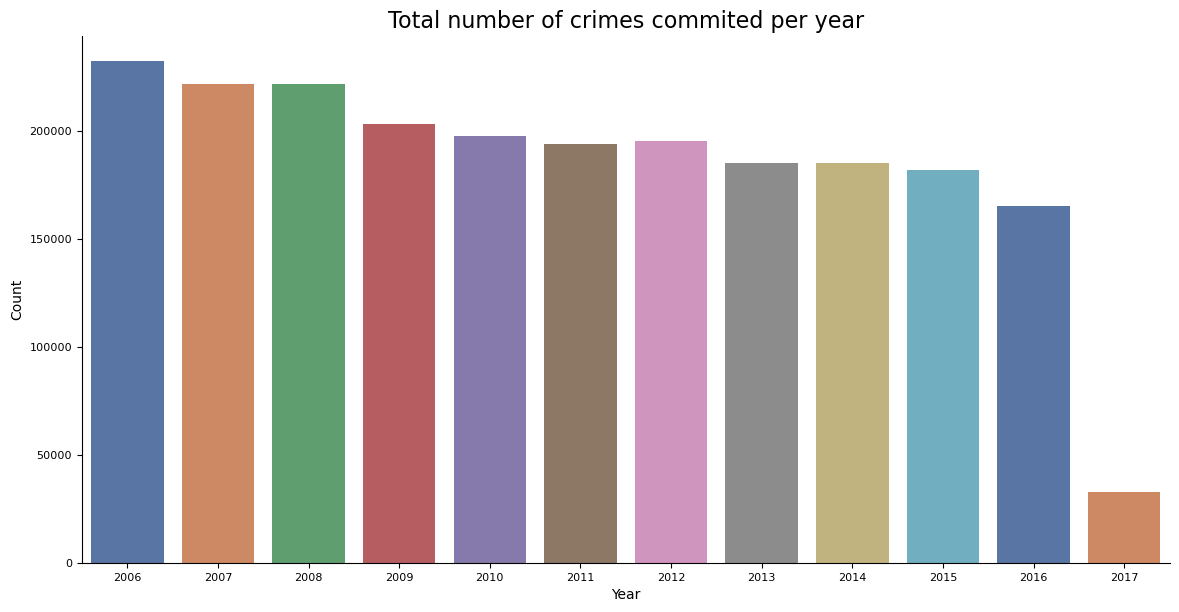

In [23]:
order = sorted(df['Crime_Year'].unique())
sns.catplot(x='Crime_Year',
            kind='count',
            palette=("deep"),
             order=order,
            height=6,
            aspect=2,
            data=df)

plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Total number of crimes commited per year", fontsize=16)

Text(0.5, 1.0, 'Number of Crimes Commited per Month')

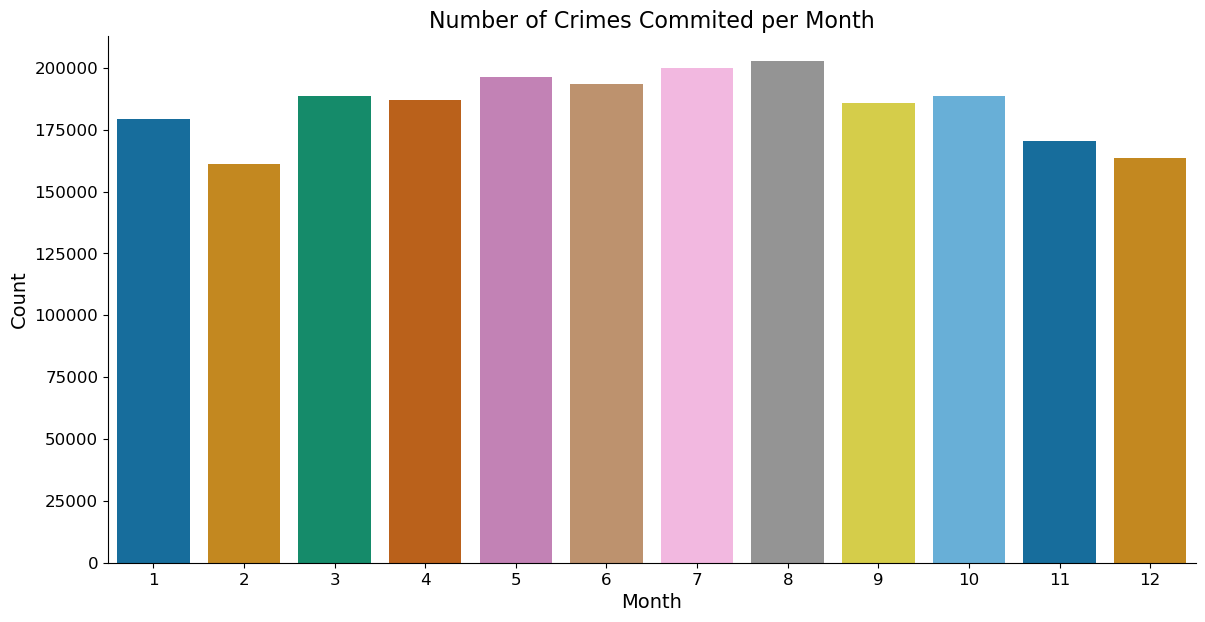

In [47]:
sns.catplot(x='Crime_Month',
           kind='count',
           height=6,
           aspect=2,
           palette=("colorblind"),
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Month", fontsize=16)

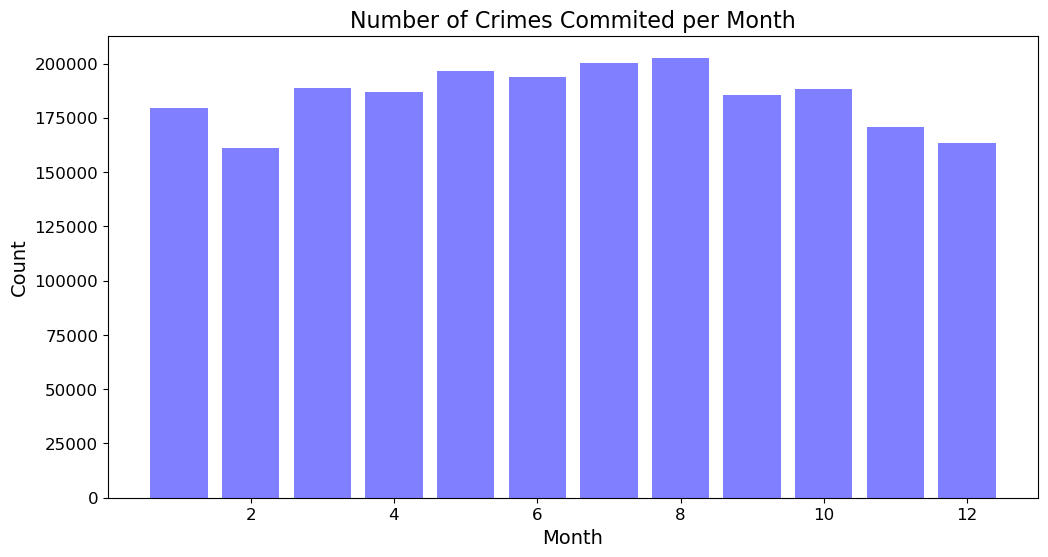

In [45]:




crime_counts = df['Crime_Month'].value_counts()


fig, ax = plt.subplots(figsize=(12,6))
ax.bar(crime_counts.index, crime_counts.values, color='blue', alpha=0.5)


ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Crimes Commited per Month', fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)



plt.show()


Text(0.5, 1.0, 'Number of Crimes Commited per Hour')

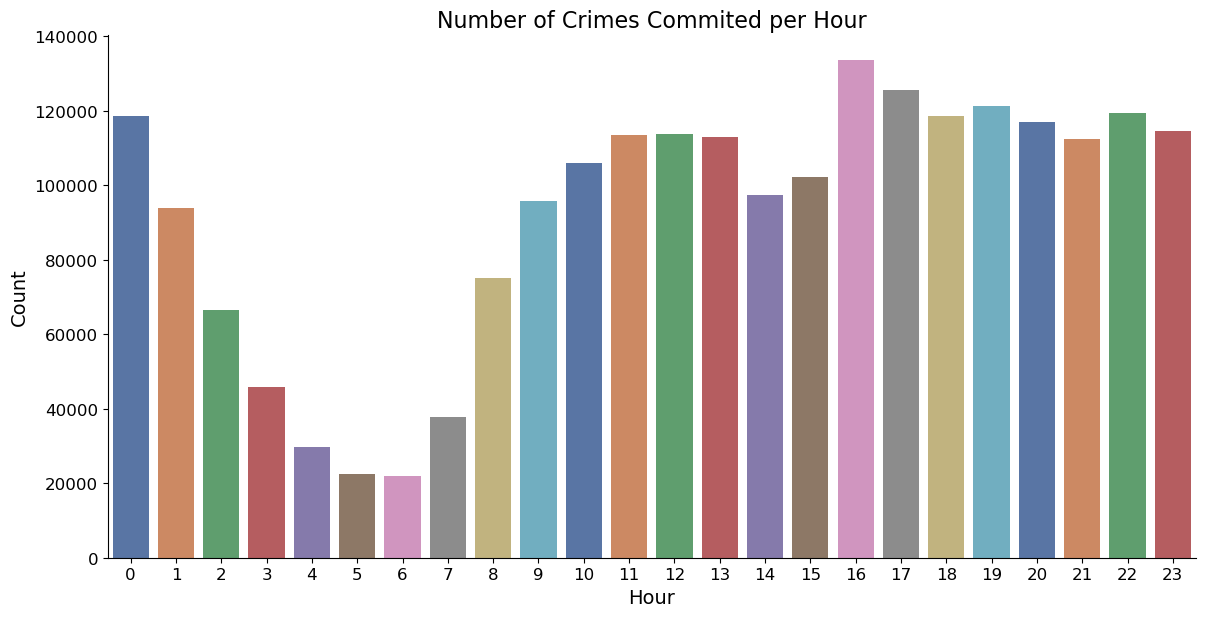

In [46]:
sns.catplot(x='Hour',
           kind='count',
           height=6,
           aspect=2,
           palette=("deep"),
           data=df)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Hour", fontsize=16)

Text(0.5, 1.0, 'Number of Times a Specific Crime was Commited')

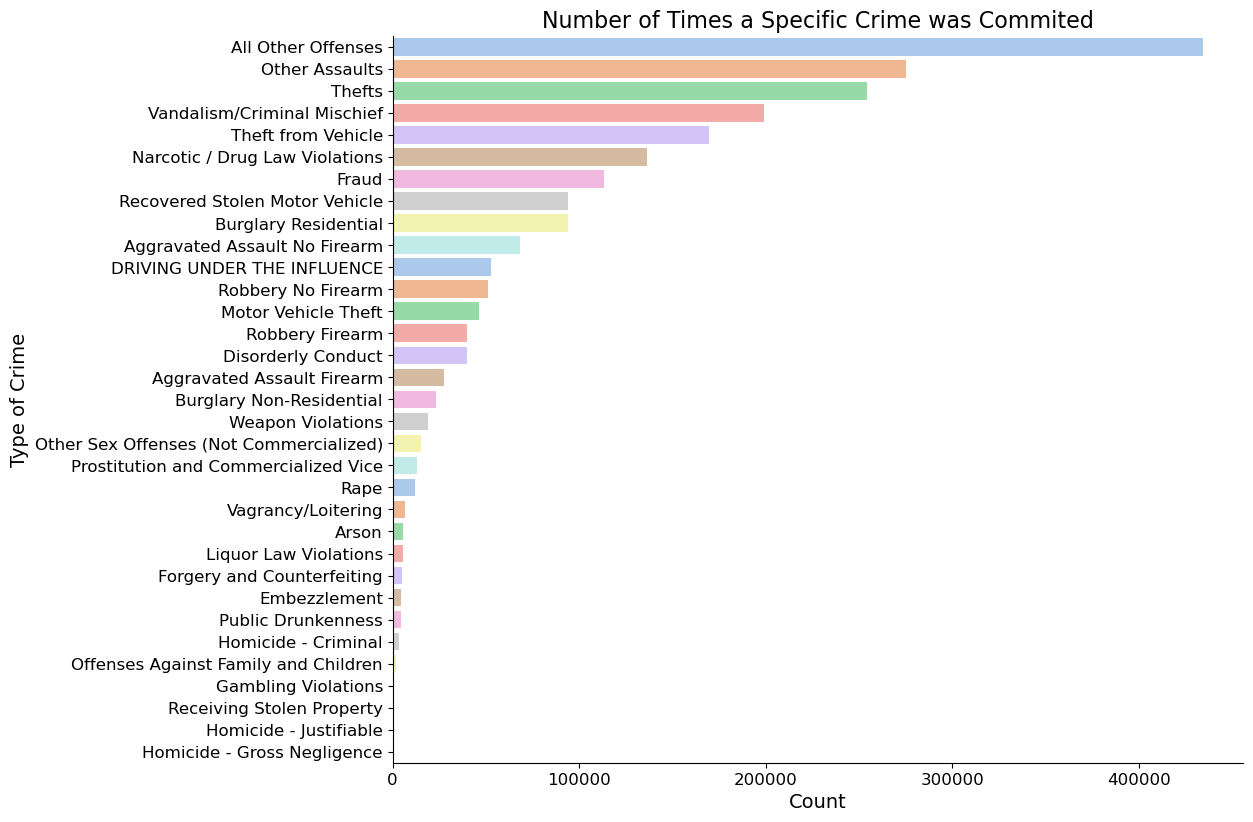

In [27]:
sns.catplot(y='Text_General_Code',
           kind ='count',
           height = 8,
           aspect =1.5, 
           palette=("pastel"),
           order=df.Text_General_Code.value_counts().index,
           data=df)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Type of Crime", fontsize=14)
plt.title("Number of Times a Specific Crime was Commited", fontsize=16)

Text(0.5, 1.0, 'Number of Crimes Commited per Police District')

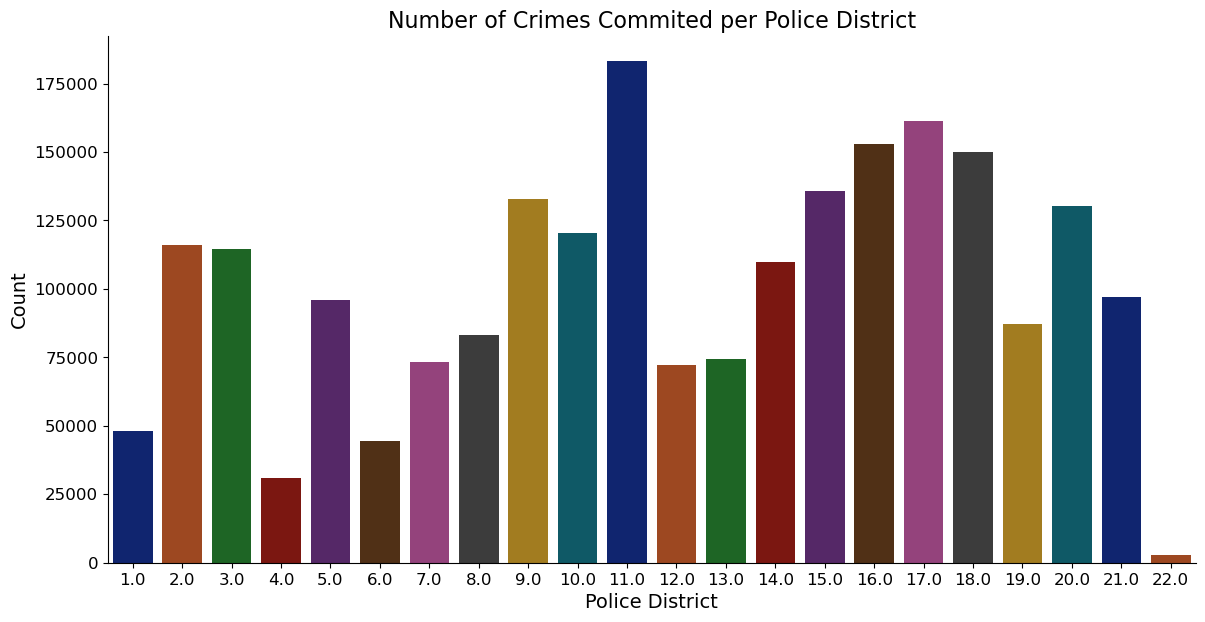

In [48]:
sns.catplot(x='Police_Districts',
           kind='count',
           height=6,
           aspect=2,
           palette=("dark"),
           data=df)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Police District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Police District", fontsize=16)

In [29]:
df['Text_General_Code'].unique()


array(['All Other Offenses', 'Other Assaults', 'Weapon Violations',
       'Public Drunkenness', 'Aggravated Assault No Firearm',
       'Disorderly Conduct', 'Thefts', 'Aggravated Assault Firearm',
       'Vandalism/Criminal Mischief', 'Recovered Stolen Motor Vehicle',
       'DRIVING UNDER THE INFLUENCE', 'Robbery No Firearm', 'Fraud',
       'Offenses Against Family and Children',
       'Narcotic / Drug Law Violations', 'Motor Vehicle Theft',
       'Theft from Vehicle', 'Burglary Residential', 'Robbery Firearm',
       'Burglary Non-Residential',
       'Other Sex Offenses (Not Commercialized)', 'Rape', 'Arson',
       'Gambling Violations', 'Forgery and Counterfeiting',
       'Embezzlement', 'Homicide - Criminal', 'Liquor Law Violations',
       'Vagrancy/Loitering', 'Prostitution and Commercialized Vice',
       'Homicide - Justifiable', 'Receiving Stolen Property',
       'Homicide - Gross Negligence'], dtype=object)

In [30]:
df

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Crime_Year,Crime_Month,Crime_Day
1038493,3,I,2006-01-01 00:00:00,2006-01-01,00:00:00,0,200603000002,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,2006,1,1
1338793,19,R,2006-01-01 00:02:00,2006-01-01,00:02:00,0,200619000047,5500 BLOCK CHERRY ST,800.0,Other Assaults,15.0,2006-01,-75.231975,39.963220,2006,1,1
1389932,3,I,2006-01-01 00:02:00,2006-01-01,00:02:00,0,200603000001,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,2006,1,1
1325562,18,Q,2006-01-01 00:04:00,2006-01-01,00:04:00,0,200618000007,400 BLOCK S 55TH ST,1500.0,Weapon Violations,14.0,2006-01,-75.232374,39.953490,2006,1,1
1395649,12,P,2006-01-01 00:05:00,2006-01-01,00:05:00,0,200612000011,1700 BLOCK S 58TH ST,1500.0,Weapon Violations,9.0,2006-01,-75.230711,39.937644,2006,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185761,7,3,2017-03-23 00:06:00,2017-03-23,00:06:00,0,201707007521,500 BLOCK AVON ST,800.0,Other Assaults,6.0,2017-03,-75.026776,40.113273,2017,3,23
2188099,2,3,2017-03-23 00:18:00,2017-03-23,00:18:00,0,201702015318,7600 E ROOSEVELT BLVD,1100.0,Fraud,2.0,2017-03,-75.051546,40.050521,2017,3,23
2184415,39,1,2017-03-23 00:26:00,2017-03-23,00:26:00,0,201739021055,5700 BLOCK MORRIS ST 101,800.0,Other Assaults,21.0,2017-03,-75.182257,40.029790,2017,3,23
2196468,2,1,2017-03-23 00:33:00,2017-03-23,00:33:00,0,201702015317,6400 BLOCK BUSTLETON AV,2600.0,All Other Offenses,2.0,2017-03,-75.070528,40.035690,2017,3,23


In [31]:
filtered_df = df[df['Text_General_Code'].isin(['All Other Offenses', 'Other Assaults', 'Thefts', 'Vandalism/Criminal Mischief', 'Theft from Vehicle','Narcotic / Drug Law Violations', 'Fraud','Recovered Stolen Motor Vehicle','Burglary Residential','Aggravated Assault No Firearm','DRIVING UNDER THE INFLUENCE','Robbery No Firearm','Motor Vehicle Theft', ])]

In [32]:
filtered_df['Text_General_Code'].unique()


array(['All Other Offenses', 'Other Assaults',
       'Aggravated Assault No Firearm', 'Thefts',
       'Vandalism/Criminal Mischief', 'Recovered Stolen Motor Vehicle',
       'DRIVING UNDER THE INFLUENCE', 'Robbery No Firearm', 'Fraud',
       'Narcotic / Drug Law Violations', 'Motor Vehicle Theft',
       'Theft from Vehicle', 'Burglary Residential'], dtype=object)

In [33]:
mycol = filtered_df[["Text_General_Code"]]
for i in mycol:
    cleanup_nums = {i: {"All Other Offenses": 0, "Other Assaults": 1, "Thefts": 2, "Vandalism/Criminal Mischief":3, "Theft from Vehicle":4,"Narcotic / Drug Law Violations":5,"Fraud":6, "Recovered Stolen Motor Vehicle":7,"Burglary Residential":8, "Aggravated Assault No Firearm":9,"DRIVING UNDER THE INFLUENCE":10, "Robbery No Firearm":11, "Motor Vehicle Theft":12}}
    df1 = filtered_df.replace(cleanup_nums)



### Building Machine Learning Model

In [34]:
feed = df1[['Lon', 'Lat', 'Crime_Year', 'Crime_Month', 
           'Crime_Day', 'Text_General_Code']]

# Taking all independent variable columns
df_train_x = feed.drop('Text_General_Code',axis = 1)

# Target variable column
df_train_y = feed['Text_General_Code']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)



In [35]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(x_train)
x_train=s.transform(x_train)
x_test=s.transform(x_test)

In [36]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
predictions_lg = lg.predict(x_test)

In [37]:
lg.score(x_test,y_test)

0.22033804572968407

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
tree.score(x_test,y_test)

0.2961444486898466

In [42]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
r.score(x_test,y_test)

0.3340438795825206